### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
path = '/Users/bobbi/Careerfoundry/Shipping_project/02 Data/Prepared Data'

# Import port data
port_data = pd.read_pickle(os.path.join(path, 'port_aggregated.pkl'))

# Import world trade data
port_trade = pd.read_pickle(os.path.join(path, 'port_trade_data.pkl'))

In [3]:
port_data.head()

,countryareaCode,country,vesselTypeCode,vessel_type,flowCode,flowDesc,date,num_pc,mtc,dwt,num_pc_ma,mtc_ma,dwt_ma,season,ship_size,region
0,136,Cayman Isds,0,Total,X,Exports,2015-05-06,0,0.0,0,0.133,0.0,903.4,Spring,Unknown,Caribbean
1,136,Cayman Isds,0,Total,X,Exports,2015-05-07,0,0.0,0,0.133,0.0,903.4,Spring,Unknown,Caribbean
2,136,Cayman Isds,0,Total,X,Exports,2015-05-08,0,0.0,0,0.133,0.0,903.4,Spring,Unknown,Caribbean
3,136,Cayman Isds,0,Total,X,Exports,2015-05-09,0,0.0,0,0.133,0.0,903.4,Spring,Unknown,Caribbean
4,136,Cayman Isds,0,Total,X,Exports,2015-05-10,0,0.0,0,0.133,0.0,903.4,Spring,Unknown,Caribbean


I am going to try an mixed port data with trade data while mantaining vessel type

In [4]:
# Divide data in subsets: import/ export
# Import
import_port = port_data[port_data['flowCode'] == "M"]

# Export
export_port = port_data[port_data['flowCode'] == "X"]

In [5]:
import_port.head()

,countryareaCode,country,vesselTypeCode,vessel_type,flowCode,flowDesc,date,num_pc,mtc,dwt,num_pc_ma,mtc_ma,dwt_ma,season,ship_size,region
1000000,470,Malta,7,Foodstuff,M,Imports,2020-11-23,0,0.0,0,0.267,7.613,904.633,Fall,Unknown,Europe
1000001,470,Malta,7,Foodstuff,M,Imports,2020-11-24,0,0.0,0,0.267,7.613,904.633,Fall,Unknown,Europe
1000002,470,Malta,7,Foodstuff,M,Imports,2020-11-25,0,0.0,0,0.267,7.613,904.633,Fall,Unknown,Europe
1000003,470,Malta,7,Foodstuff,M,Imports,2020-11-26,0,0.0,0,0.267,7.613,904.633,Fall,Unknown,Europe
1000004,470,Malta,7,Foodstuff,M,Imports,2020-11-27,0,0.0,0,0.267,7.613,904.633,Fall,Unknown,Europe


In [6]:
export_port.head()

,countryareaCode,country,vesselTypeCode,vessel_type,flowCode,flowDesc,date,num_pc,mtc,dwt,num_pc_ma,mtc_ma,dwt_ma,season,ship_size,region
0,136,Cayman Isds,0,Total,X,Exports,2015-05-06,0,0.0,0,0.133,0.0,903.4,Spring,Unknown,Caribbean
1,136,Cayman Isds,0,Total,X,Exports,2015-05-07,0,0.0,0,0.133,0.0,903.4,Spring,Unknown,Caribbean
2,136,Cayman Isds,0,Total,X,Exports,2015-05-08,0,0.0,0,0.133,0.0,903.4,Spring,Unknown,Caribbean
3,136,Cayman Isds,0,Total,X,Exports,2015-05-09,0,0.0,0,0.133,0.0,903.4,Spring,Unknown,Caribbean
4,136,Cayman Isds,0,Total,X,Exports,2015-05-10,0,0.0,0,0.133,0.0,903.4,Spring,Unknown,Caribbean


### Create scatterplots to explore correlation.

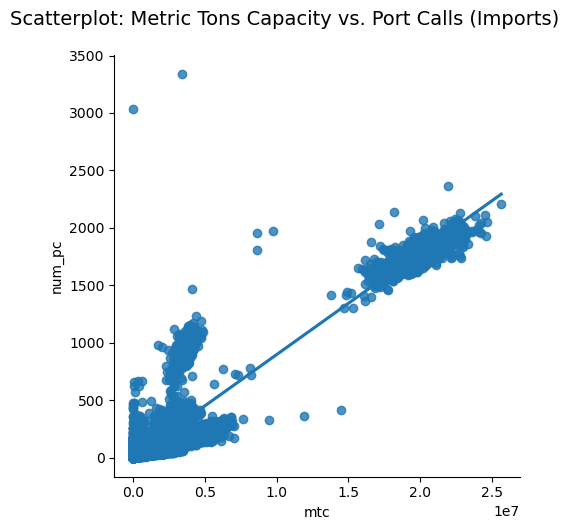

In [7]:
plot_imports = sns.lmplot(x = 'mtc', y='num_pc', data = import_port)
mtc_supervise = plot_imports.fig.suptitle("Scatterplot: Metric Tons Capacity vs. Port Calls (Imports)", fontsize=14, y=1.05)
plt.savefig('/Users/bobbi/Careerfoundry/Shipping_project/04 Analysis/Visualizations/mtc_supervise.png', dpi=300, bbox_inches='tight')


Text(0.5, 1.05, 'Scatterplot: Metric Tons Capacity vs. Port Calls (Exports)')

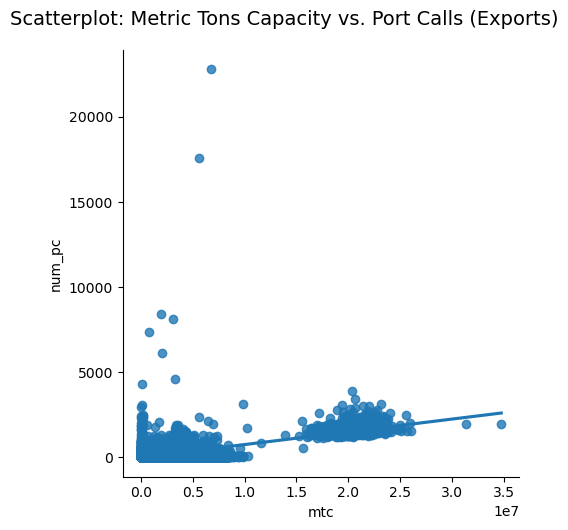

In [8]:
plot_exports = sns.lmplot(x = 'mtc', y='num_pc', data = export_port)
plot_exports.fig.suptitle("Scatterplot: Metric Tons Capacity vs. Port Calls (Exports)", fontsize=14, y=1.05)

Text(0.5, 1.05, 'Scatterplot: Dead Weight Tons vs. Port Calls (Imports)')

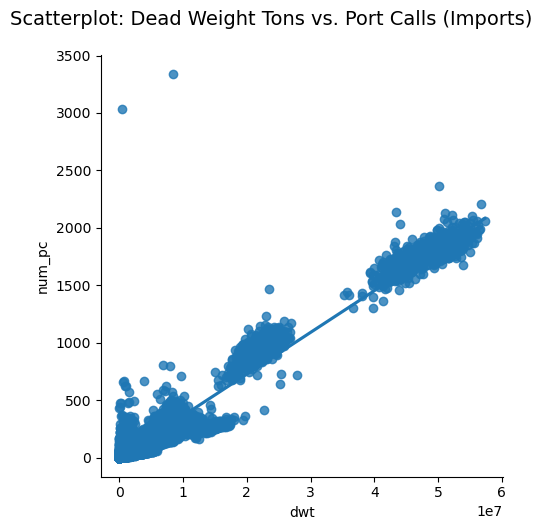

In [9]:
plot_import_dwt = sns.lmplot(x = 'dwt', y='num_pc', data = import_port)
plot_import_dwt.fig.suptitle("Scatterplot: Dead Weight Tons vs. Port Calls (Imports)", fontsize=14, y=1.05)

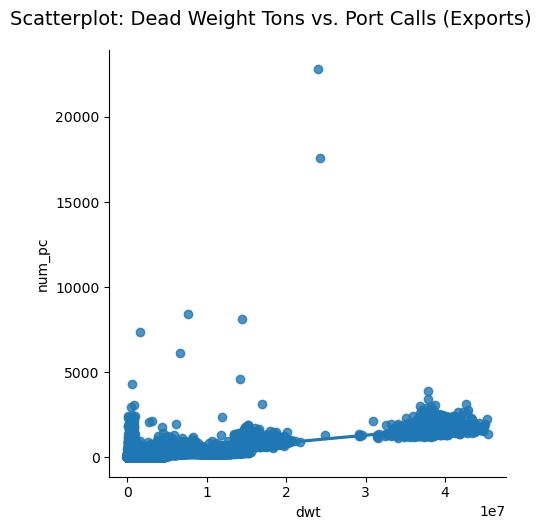

In [10]:
plot_exports = sns.lmplot(x = 'dwt', y='num_pc', data = export_port)
plot_exports.fig.suptitle("Scatterplot: Dead Weight Tons vs. Port Calls (Exports)", fontsize=14, y=1.05)
plt.savefig('/Users/bobbi/Careerfoundry/Shipping_project/04 Analysis/Visualizations/trade_scatterplot.png', dpi=300, bbox_inches='tight')


As we can see a positive relation exists between ship capacity and weight and number of port calls but only when we talk about import goods. Our hypothessis will be: The bigger the metric ton capacity and higher the number of port calls.

In [11]:
# Fit a linear regression model for imports
X = import_port['mtc'].values.reshape(-1, 1)
y = import_port['num_pc'].values.reshape(-1,1)

X

array([[    0.  ],
       [    0.  ],
       [    0.  ],
       ...,
       [    0.  ],
       [ 8186.03],
       [13003.2 ]], shape=(1000000, 1))

In [12]:
y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [2],
       [1]], shape=(1000000, 1))

In [13]:
# Split data into train set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [14]:
# Create a regression object
regression = LinearRegression()

In [15]:
regression.fit(X_train, y_train)

LinearRegression()

In [16]:
# Predict the value of y using x
y_predict = regression.predict(X_test)

print(y_predict)

[[6.77010307]
 [6.25028844]
 [1.95579529]
 ...
 [1.95579529]
 [2.09275508]
 [5.05106004]]


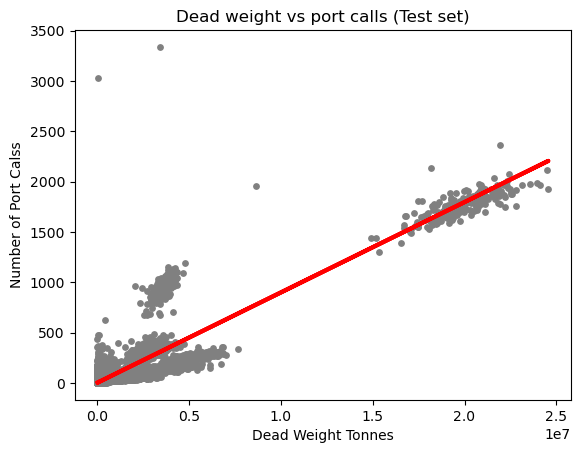

In [17]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predict, color='red', linewidth =3)
plot_test.title('Dead weight vs port calls (Test set)')
plot_test.xlabel('Dead Weight Tonnes')
plot_test.ylabel('Number of Port Calss')
plt.savefig('/Users/bobbi/Careerfoundry/Shipping_project/04 Analysis/Visualizations/dwt_supervise_test.png', dpi=300, bbox_inches='tight')

plot_test.show()

In [18]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predict) # This is the mean squared error
r2 = r2_score(y_test, y_predict) # This is the R2 score. 

In [19]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[8.97531998e-05]]
Mean squared error:  611.9574102394004
R2 score:  0.8096561263677068


In [20]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predict.flatten()})
data.head(30)

,Actual,Predicted
0,3,6.770103
1,3,6.250288
2,0,1.955795
3,5,8.103889
4,0,1.955795
5,0,1.955795
6,1,2.117574
7,105,1.955795
8,0,1.955795
9,0,1.955795


In [21]:
# Predict.

y_predict_train = regression.predict(X_train) # This is predicting X_train!

In [22]:
rmse = mean_squared_error(y_train, y_predict_train)
r2 = r2_score(y_train, y_predict_train)

In [23]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[8.97531998e-05]]
Mean squared error:  623.1660998351123
R2 score:  0.8165217573340751


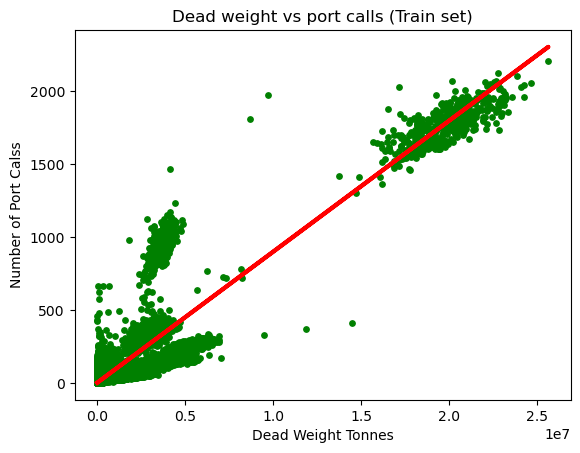

In [24]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predict_train, color='red', linewidth =3)
plot_test.title('Dead weight vs port calls (Train set)')
plot_test.xlabel('Dead Weight Tonnes')
plot_test.ylabel('Number of Port Calss')
plt.savefig('/Users/bobbi/Careerfoundry/Shipping_project/04 Analysis/Visualizations/dwt_supervise_train.png', dpi=300, bbox_inches='tight')

plot_test.show()

The regression model shows that the point are located around the line but at the same time scattered and also we have two groups of points showing significants outliers. 

The slope of the regression line is 8.97531998e-5 which is very close to zero, suggesting that mtc has a very weak linear relationship with num_pc. This could mean that changes in metric tons capacity has little to no effect on number of port calls.

The r2-score on the test set is 0.8097 which means that approximately 81% of the variance in number of port calls is explained by metric tons capacity, indicating a good fit. However, the slope being close to zero suggests that the relationship may not be meaninful despicte the high r2-score.

The model’s performance on the test set can be evaluated using the Mean Squared Error (MSE) and R² score:

 * The MSE on the test set is 611.96. This measures the average squared difference between the predicted and actual values of num_pc. A lower MSE indicates better model performance. 

* The R² score on the test set is 0.8097, which is high and suggests that the model explains a significant portion of the variance in num_pc. However, the low slope value raises questions about the practical significance of the relationship.


Outliers seem to be hurting the possible analysis of the regression model

In [25]:
# Calculate Q1, Q3, and IQR for DWT and num_pc
Q1_mtc = import_port['mtc'].quantile(0.25)
Q3_mtc = import_port['mtc'].quantile(0.75)
IQR_mtc = Q3_mtc - Q1_mtc

Q1_num_pc = import_port['num_pc'].quantile(0.25)
Q3_num_pc = import_port['num_pc'].quantile(0.75)
IQR_num_pc = Q3_num_pc - Q1_num_pc

# Define lower and upper bounds for outliers
lower_bound_mtc = Q1_mtc - 1.5 * IQR_mtc
upper_bound_mtc = Q3_mtc + 1.5 * IQR_mtc

lower_bound_num_pc = Q1_num_pc - 1.5 * IQR_num_pc
upper_bound_num_pc = Q3_num_pc + 1.5 * IQR_num_pc

# Filter out outliers
filtered_df = import_port[
    (import_port['mtc'] >= lower_bound_mtc) &
    (import_port['mtc'] <= upper_bound_mtc) &
    (import_port['num_pc'] >= lower_bound_num_pc) &
    (import_port['num_pc'] <= upper_bound_num_pc)
]

print("Original dataset size:", len(import_port))
print("Filtered dataset size (without outliers):", len(filtered_df))

Original dataset size: 1000000
Filtered dataset size (without outliers): 799989


In [26]:
# Prepare the data
X_out = filtered_df['mtc'].values.reshape(-1,1)
y_out = filtered_df['num_pc'].values.reshape(-1,1)

In [27]:
# Split data into train set and test set

X_out_train, X_out_test, y_out_train, y_out_test = train_test_split(X_out, y_out, test_size=0.3, random_state=0)

In [28]:
print("Shape of X_out_train:", X_out_train.shape)
print("Shape of X_out_test:", X_out_test.shape)
print("Shape of y_out_train:", y_out_train.shape)
print("Shape of y_out_test:", y_out_test.shape)

Shape of X_out_train: (559992, 1)
Shape of X_out_test: (239997, 1)
Shape of y_out_train: (559992, 1)
Shape of y_out_test: (239997, 1)


In [29]:
# Fit the regression model
regression_out = LinearRegression()
regression_out.fit(X_out, y_out)

LinearRegression()

In [30]:
y_predict_out = regression_out.predict(X_out_test)

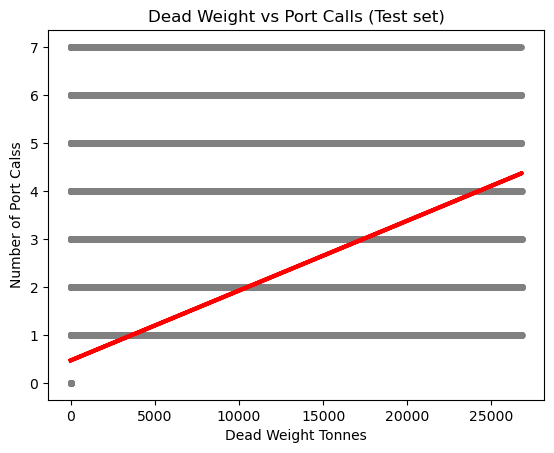

In [31]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_out_test, y_out_test, color='gray', s = 15)
plot_test.plot(X_out_test, y_predict_out, color='red', linewidth =3)
plot_test.title('Dead Weight vs Port Calls (Test set)')
plot_test.xlabel('Dead Weight Tonnes')
plot_test.ylabel('Number of Port Calss')
plot_test.show()

In [32]:
rmse_out = mean_squared_error(y_out_test, y_predict_out) # This is the mean squared error
r2_out = r2_score(y_out_test, y_predict_out) # This is the R2 score. 

In [33]:
print('Slope:', regression_out.coef_)
print('Mean squared error:', rmse_out)
print('R² score:', r2_out)

Slope: [[0.00014551]]
Mean squared error: 1.301822805952806
R² score: 0.2947026844127164


The slope is still very close to zero, which suggests that Distance from metro has little impact on Price per unit. This is surprising, as one might expect properties closer to the metro to be more expensive.

The high R² score might be misleading in this context because the slope indicates that the relationship is not practically significant.

Despite the weak relationship, the high R² score suggests that the model explains a large portion of the variance in Price per unit. This could be due either the presence of other influential variables not included in the model or the data being highly clustered around the regression line, even though the slope is small.

Removing outliers has improved the model’s performance, as evidenced by the relatively low MSE and high R² score. Outliers can disproportionately influence the regression line, so removing them often leads to a more accurate model.

In [34]:
# Create a dataframe comparing the actual and predicted values of y.

data_out = pd.DataFrame({'Actual': y_out_test.flatten(), 'Predicted': y_predict_out.flatten()})
data_out.head(30)

,Actual,Predicted
0,1,0.468630
1,0,0.468630
2,0,0.468630
3,2,2.113243
4,0,0.468630
5,2,0.468630
6,4,0.468630
7,0,0.468630
8,0,0.468630
9,0,0.468630


In [35]:
# Predict.

y_predict_train_out = regression.predict(X_out_train) # This is predicting X_train!

In [36]:
rmse_train = mean_squared_error(y_out_train, y_predict_train_out)
r2_train = r2_score(y_out_train, y_predict_train_out)
print('Slope:' ,regression_out.coef_)
print('Mean squared error: ', rmse_train)
print('R2 score: ', r2_train)

Slope: [[0.00014551]]
Mean squared error:  3.2552357869156774
R2 score:  -0.7886600913688113


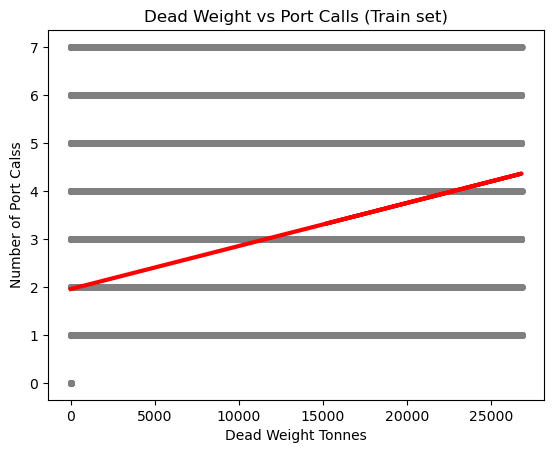

In [37]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_out_train, y_out_train, color='gray', s = 15)
plot_test.plot(X_out_train, y_predict_train_out, color='red', linewidth =3)
plot_test.title('Dead Weight vs Port Calls (Train set)')
plot_test.xlabel('Dead Weight Tonnes')
plot_test.ylabel('Number of Port Calss')
plot_test.show()

#### Port-trade data regression model

In [38]:
# Divide data in subsets: import/ export
# Import
import_port_trade = port_trade[port_trade['flowCode'] == "M"]

# Export
export_port_trade = port_trade[port_trade['flowCode'] == "X"]

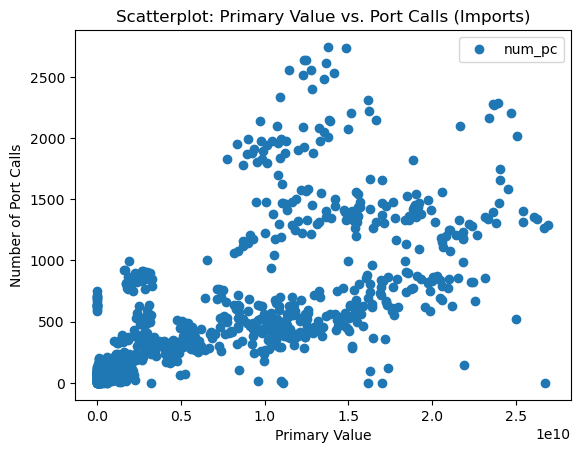

In [39]:
import_port_trade.plot(x = 'primaryValue', y='num_pc', style='o')  
plt.title("Scatterplot: Primary Value vs. Port Calls (Imports)") 
plt.xlabel('Primary Value')  
plt.ylabel('Number of Port Calls')  
plt.show()

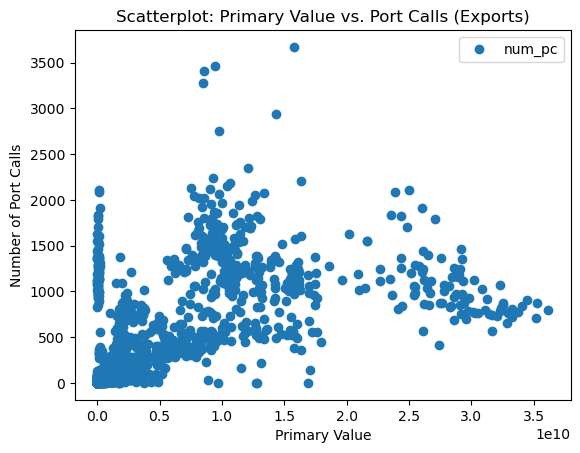

In [40]:
export_port_trade.plot(x = 'primaryValue', y='num_pc', style='o')  
plt.title("Scatterplot: Primary Value vs. Port Calls (Exports)") 
plt.xlabel('Primary Value')  
plt.ylabel('Number of Port Calls')  
plt.show()

As we can see in both scaterplots the number of calls is highly related to the primary trade value.

In [41]:
X_trade = import_port_trade['primaryValue'].values.reshape(-1, 1)
y_trade = import_port_trade['num_pc'].values.reshape(-1,1)

In [42]:
# Split data into train set and test set

X_trade_train, X_trade_test, y_trade_train, y_trade_test = train_test_split(X_trade, y_trade, test_size=0.3, random_state=0)

In [43]:
# Create a regression object
regression_trade = LinearRegression()

In [44]:
regression_trade.fit(X_trade_train, y_trade_train)

LinearRegression()

In [45]:
# Predict the value of y using x
y_predicted = regression_trade.predict(X_trade_test)

print(y_predicted)

[[ 366.01305189]
 [  92.95021857]
 [ 100.17990034]
 [  96.49303686]
 [ 113.44419021]
 [ 127.4159274 ]
 [1328.29710318]
 [ 107.82677371]
 [1062.14722935]
 [ 418.26448439]
 [ 847.58909976]
 [  92.79926636]
 [ 211.36214399]
 [  95.23329803]
 [  93.42746047]
 [ 232.6719277 ]
 [ 617.36218076]
 [1266.90697703]
 [ 130.57613007]
 [ 307.34287856]
 [ 115.93387827]
 [ 103.72398454]
 [ 103.26390775]
 [  92.38404852]
 [ 190.84217293]
 [ 175.22582673]
 [  94.25631742]
 [1091.5062536 ]
 [ 257.16523936]
 [ 824.10651915]
 [ 124.40260595]
 [ 107.46627871]
 [ 168.30867176]
 [ 169.35402872]
 [ 452.99074282]
 [ 107.82788857]
 [1643.80713509]
 [ 263.43572212]
 [ 133.29207902]
 [ 110.76047832]
 [ 130.38204242]
 [ 226.91981066]
 [  94.01956124]
 [ 151.4523101 ]
 [ 148.25615616]
 [ 140.52368954]
 [ 101.09013298]
 [ 100.95594751]
 [1203.0749868 ]
 [ 170.64048932]
 [ 504.92999972]
 [ 632.46830094]
 [  92.40027442]
 [ 630.94891148]
 [ 192.62475736]
 [ 261.15339177]
 [ 182.66047203]
 [  94.6655117 ]
 [1161.1926036

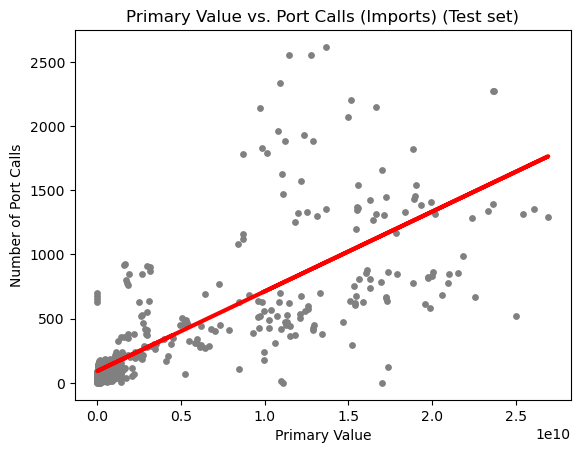

In [46]:
# Create a plot that shows the regression line from the model on the test set.

plot_test_trade = plt
plot_test_trade.scatter(X_trade_test, y_trade_test, color='gray', s = 15)
plot_test_trade.plot(X_trade_test, y_predicted, color='red', linewidth =3)
plot_test_trade.title('Primary Value vs. Port Calls (Imports) (Test set)')
plot_test_trade.xlabel('Primary Value')  
plot_test_trade.ylabel('Number of Port Calls')
plot_test_trade.show()

In [47]:
# Create objects that contain the model summary statistics.

rmse_trade = mean_squared_error(y_trade_test, y_predicted) # This is the mean squared error
r2_trade = r2_score(y_trade_test, y_predicted) # This is the R2 score. 

In [48]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression_trade.coef_)
print('Mean squared error: ', rmse_trade)
print('R2 score: ', r2_trade)

Slope: [[6.20261882e-08]]
Mean squared error:  112664.23368085457
R2 score:  0.560125968852369


In [49]:
# Create a dataframe comparing the actual and predicted values of y.

data_trade = pd.DataFrame({'Actual': y_trade_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,3,6.770103
1,3,6.250288
2,0,1.955795
3,5,8.103889
4,0,1.955795
5,0,1.955795
6,1,2.117574
7,105,1.955795
8,0,1.955795
9,0,1.955795


In [50]:
# Predict.

y_predicted_train_trade = regression_trade.predict(X_trade_train) # This is predicting X_train!

In [51]:
rmse_trade = mean_squared_error(y_trade_train, y_predicted_train_trade)
r2_trade = r2_score(y_trade_train, y_predicted_train_trade)

In [52]:
print('Slope:' ,regression_trade.coef_)
print('Mean squared error: ', rmse_trade)
print('R2 score: ', r2_trade)

Slope: [[6.20261882e-08]]
Mean squared error:  103834.03337909904
R2 score:  0.5815622390651383


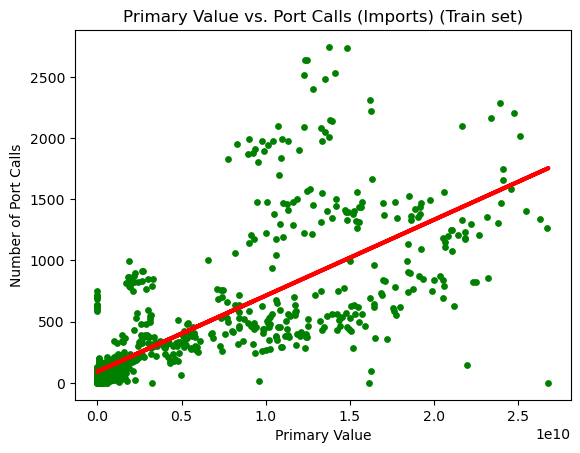

In [53]:
# Visualizing the training set results.

plt_trade = plt
plt_trade.scatter(X_trade_train, y_trade_train, color='green', s = 15)
plt_trade.plot(X_trade_train, y_predicted_train_trade, color='red', linewidth =3)
plt_trade.title('Primary Value vs. Port Calls (Imports) (Train set)')
plt_trade.xlabel('Primary Value')  
plt_trade.ylabel('Number of Port Calls')
plt.savefig('/Users/bobbi/Careerfoundry/Shipping_project/04 Analysis/Visualizations/trade_supervised.png', dpi=300, bbox_inches='tight')
plt_trade.show()

**Test Set**  
The slope is 6.20261882e-08, which is still extremely small. Although each one‐unit increase in Primary Value corresponds to only a tiny change in the Number of Port Calls, the model achieves an R² score of 0.5601, indicating that about 56% of the variance in port calls is explained by Primary Value. The mean squared error (MSE) of 112,664.23 shows that while the model has moderate explanatory power (as reflected by R²), there is still a notable amount of prediction error.

**Train Set**  
The slope remains the same (6.20261882e-08), again reflecting a minimal per‐unit effect of Primary Value on port calls. Here, the model’s R² score is 0.5816, meaning it explains roughly 58% of the variance in the training data. The MSE of 103,834.03 is slightly lower than in the test set, suggesting marginally better fit on the training data, though the model’s predictive performance is still far from perfect. Overall, despite the small slope, the moderate R² values in both sets imply a reasonably consistent but not overwhelmingly strong relationship between Primary Value and Number of Port Calls.